# Solutions for Lab Sheet 3 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-3-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [11]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling (uncomment if you want)
import numpy as np               # math

As done in previous lab sheets, we first download a wave file $s[k]$ using the `curl` command and the load it to a variable. Please note that the `curl` command below is slightly modified in comparison to previous lab sheets as it is using a variable name in curly brackets ({}). We can re-use the file name then later in the `sf.read()` command.

In [12]:
# download speech and noise example files
s_file_name = 'speech_8kHz_murder.wav'
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/{s_file_name} -o {s_file_name} 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  328k  100  328k    0     0  3225k      0 --:--:-- --:--:-- --:--:-- 3256k


In [13]:
import soundfile as sf
from IPython import display as ipd

# load speech wave into variable
s, fs = sf.read(s_file_name)

# listen to the sound file (if you want)
ipd.Audio(s, rate=fs)

## Block Processing

To illustrate block processing we first cut a piece of $4096$ samples, starting at $10$ seconds, i.e. starting at sample no. $80,000$ for a sampling rate of $f_s = 8000$ Hz from $s[k]$ indicated in red slice in the upper panel and repeated in the lower panel in the figure below.

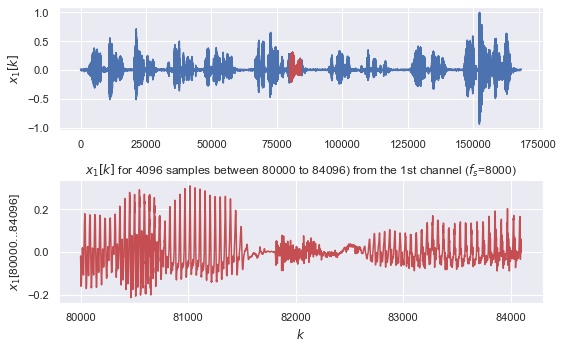

In [15]:
# lets cut out a piece of the data and cisualise it
start_sample = int(10*fs);                   # start at 10 sec
#print(start_sample)
no_of_samples = 4096;                        # no of samples we want to cut out    
end_sample   = start_sample + no_of_samples; # last sample to be cut out
sample_vec = np.linspace(start_sample, end_sample, no_of_samples)
x1=s[start_sample:end_sample];

plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.plot(np.arange(0,len(s)),s)
plt.ylabel('$x_1[k]$')
plt.plot(sample_vec,x1,'r')
plt.subplot(2,1,2)
plt.plot(sample_vec,x1,'r')
plt.xlabel('$k$')
plt.ylabel('$x_1$[' + str(start_sample) + '...' + str(end_sample) + ']')
plt.title('$x_1[k]$ for ' + str(len(x1)) + ' samples between ' 
          + str(start_sample) + ' to ' + str(end_sample) + 
          ') from the 1st channel ($f_s$=' + str(fs) +')')
plt.tight_layout() # this allowes for some space for the title text.

In [16]:
# listen to the short cut-out
ipd.Audio(x1, rate=fs)

As commonly done for speech processing algorithms, a block processing (sliding window approach) is followed.

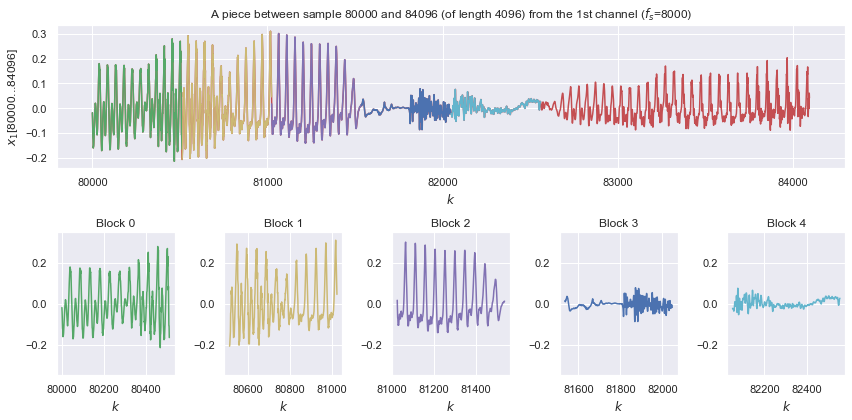

In [19]:
# lets cut out a piece of the data
Lw   = 512                    # frame length
Lov  = 1                      # frame overlap factor 
Lhop = int(np.round(Lw/Lov)); # frame hop size

# creating grid of axes for subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2, 5), loc=(0, 0), colspan=5)
ax2 = plt.subplot2grid(shape=(2, 5), loc=(1, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(2, 5), loc=(1, 1), colspan=1)
ax4 = plt.subplot2grid(shape=(2, 5), loc=(1, 2), colspan=1)
ax5 = plt.subplot2grid(shape=(2, 5), loc=(1, 3), colspan=1)
ax6 = plt.subplot2grid(shape=(2, 5), loc=(1, 4), colspan=1)
ax_blocks = [ax2, ax3, ax4, ax5, ax6]

# plot signal part in upper panel (axis ax1)
ax1.plot(sample_vec,x1,'r') #
ax1.set_xlabel('$k$')
ax1.set_ylabel('$x_1$[' + str(start_sample) + '...' + str(end_sample) + ']');
ax1.set_title('A piece between sample ' + str(start_sample) + 
          ' and ' + str(end_sample) + ' (of length ' + str(len(x1)) + 
          ') from the 1st channel ($f_s$=' + str(fs) +')')
          
# plot single blocks in lower panels 
clrs = ['g','y','m','b','c','k']; # define a vector of colours
for ii,k in enumerate(range(start_sample,start_sample+5*Lhop,Lhop)):
    block_k_vec = np.arange(k,k+Lw)
    block_sig_vec = x1[ii*Lhop:ii*Lhop+Lw]
    ax1.plot(block_k_vec,block_sig_vec,clrs[ii])

    ax_blocks[ii].plot(block_k_vec,block_sig_vec,clrs[ii])
    ax_blocks[ii].set_xlabel('$k$')
    ax_blocks[ii].set_ylim(-0.35, 0.35)
    ax_blocks[ii].set_title('Block ' + str(ii))

# automatically adjust padding horizontally 
# as well as vertically.
plt.tight_layout()

### Windowing

In the following we need the [Hamming Window](https://en.wikipedia.org/wiki/Window_function#Hann_and_Hamming_windows) (proposed by Richard W. Hamming) defined as

$$w_{\text{Hm}}[kT_s]=0.54 - 0.46  \cdot  cos\left(\frac{2\cdot \pi \cdot k}{L_w -1}\right)$$

This is why it is visualised here for a signal frame length $L_w=512$, frame hop size $L_{\mathrm{hop}} = \lfloor L_w/L_{\mathrm{ov}}\rceil = 128$ (for a frame overlap factor $L_{\mathrm{ov}}=4$), and the window parameters $a=0.54$,
$b=- 0.46$.

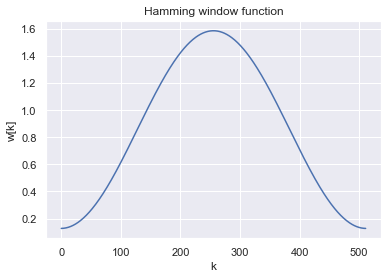

In [69]:
a=0.54    # window parameter a
b=- 0.46  # window parameter b
k_vek=np.arange(0,Lw)
w=2*(np.sqrt(Lhop/Lw)) / np.sqrt((4*a**2) + 2*(b ** 2))*(a + b*np.cos(np.pi / Lw*(2*k_vek + 1)))

plt.plot(w);
plt.xlabel('k');
plt.ylabel('w[k]');
plt.title('Hamming window function');

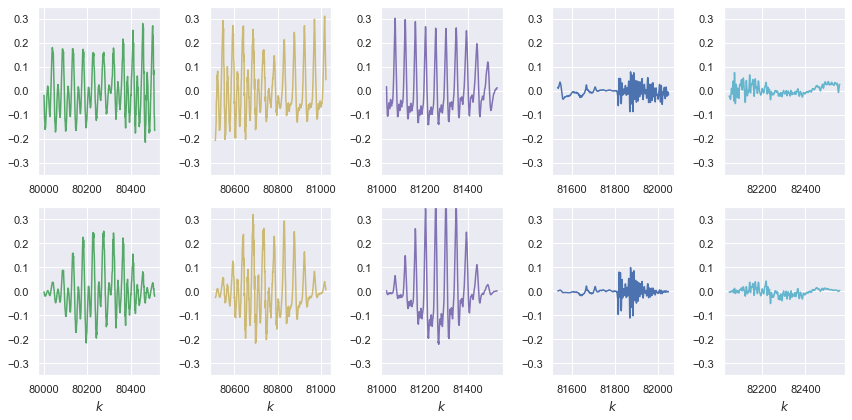

In [75]:
# creating grid for subplots
plt.figure(figsize=(12, 6))
 
for ii,k in enumerate(range(start_sample,start_sample+5*Lhop,Lhop)):
    plt.subplot(2,5,ii+1)
    plt.plot(np.arange(k,k+Lw),x1[ii*Lhop:ii*Lhop+Lw],clrs[ii][0])
    plt.ylim(-0.35, 0.35)
    plt.subplot(2,5,ii+6)
    plt.plot(np.arange(k,k+Lw),x1[ii*Lhop:ii*Lhop+Lw]*w,clrs[ii][0])
    #plt.plot(np.arange(k,k+Lw),w,'r--')
    
    plt.xlabel('$k$')
    plt.ylim(-0.35, 0.35)

# automatically adjust padding horizontally 
# as well as vertically.
plt.tight_layout()
  
# display plot
plt.show()

## Short-term energy

Download two wave files `https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/voiced_unvoiced_e.wav` and `https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/voiced_unvoiced_z.wav` and store them in variables `e` and `z`:

In [9]:
file_name = 'voiced_unvoiced_e.wav'

# download speech and noise example files
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/{file_name} -o {file_name} 
# load speech wave into variable
e, fs = sf.read(file_name)

print('File "' + file_name + '" loaded. It has a sampling rate of f_s = ' + str(fs) + ' Hz.')

file_name = 'voiced_unvoiced_z.wav'

# download speech and noise example files
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/{file_name} -o {file_name} 
# load speech wave into variable
z, fs = sf.read(file_name)

print('File "' + file_name + '" loaded. It has a sampling rate of f_s = ' + str(fs) + ' Hz.')

File "voiced_unvoiced_e.wav" loaded. It has a sampling rate of f_s = 44100 Hz.


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 77100  100 77100    0     0  3060k      0 --:--:-- --:--:-- --:--:-- 3137k


File "voiced_unvoiced_z.wav" loaded. It has a sampling rate of f_s = 44100 Hz.


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 65378  100 65378    0     0  1977k      0 --:--:-- --:--:-- --:--:-- 2059k


In [8]:
# listen to the sound file (if you want)
ipd.Audio(e, rate=fs)

In [7]:
# listen to the sound file (if you want)
ipd.Audio(z, rate=fs)

## Zero-Crossing Rate

## Correlation of two sequences

In [78]:
def correlation(signal1, signal2):
    """Return the correlation value of two signals which are assumed to be normalized (mean 0, std 1)."""
    return np.mean(signal1 * signal2)

In [79]:
def normalize_and_correlate(signal1, signal2):
    """Return the correlation value of two signals after normalizing them."""
    return correlation(
        ((signal1 - np.mean(signal1)) / np.std(signal1)),
        ((signal2 - np.mean(signal2)) / np.std(signal2)),
    )

In [84]:
def plot_correlation(signal1, signal2, title=""):
    # Ensure that both signals have the same number of samples
    assert len(signal1) == len(signal2)
    
    # Ensure that the signals have both mean 0 and standard deviation 1
    signal1 = (signal1 - np.mean(signal1)) / np.std(signal1)
    signal2 = (signal2 - np.mean(signal2)) / np.std(signal2)
    
    multiplied_signals = signal1 * signal2
    correlation_value = correlation(signal1, signal2)

    y_max = max(np.max(np.abs(signal1)), np.max(np.abs(signal2)), np.max(np.abs(multiplied_signals)))
    
    #fig, axs = plt.subplots(3, figsize=(12, 6))
    fig = plt.figure(figsize=(12, 6), constrained_layout=True)
    fig.suptitle(title)

    # Create grid for the different plots
    gs = fig.add_gridspec(3, 10)

    axs = [fig.add_subplot(gs[0, :-1]), fig.add_subplot(gs[1, :-1]), 
           fig.add_subplot(gs[2, :-1]), fig.add_subplot(gs[:,-1])]
    
    axs[0].plot(np.arange(len(signal1)), signal1, marker="o", lw=0.1)
    axs[1].plot(np.arange(len(signal2)), signal2, marker="o", lw=0.1)
    axs[2].plot(np.arange(len(multiplied_signals)), multiplied_signals, marker="o", lw=0.1)
    axs[3].axhline(0, color="black", lw=0.5)
    axs[3].axhline(correlation_value, lw=5)

    axs[0].set_ylim(-y_max*1.1, y_max*1.1)
    axs[1].set_ylim(-y_max*1.1, y_max*1.1)
    axs[2].set_ylim(-y_max*1.1, y_max*1.1)
    axs[2].set_ylim(-np.max(np.abs(multiplied_signals)) * 1.1, np.max(np.abs(multiplied_signals)) * 1.1)
    axs[3].set_ylim(-1.01, 1.01)
    axs[3].set_xticks([])
    axs[0].get_xaxis().set_ticks([])
    axs[0].set_ylabel("$x[t]$")
    axs[1].set_ylabel("$y[t]$")
    axs[2].set_ylabel("$x[t]\cdot y[t]$")
    axs[1].get_xaxis().set_ticks([])
    axs[2].set_xlabel("time in samples")
    axs[0].title.set_text("The first signal $x[t]$")
    axs[1].title.set_text("The second signal $y[t]$")
    axs[2].title.set_text("Element-wise multiplication of both signals")
    axs[3].title.set_text("Correlation: {:.2f}".format(correlation_value))

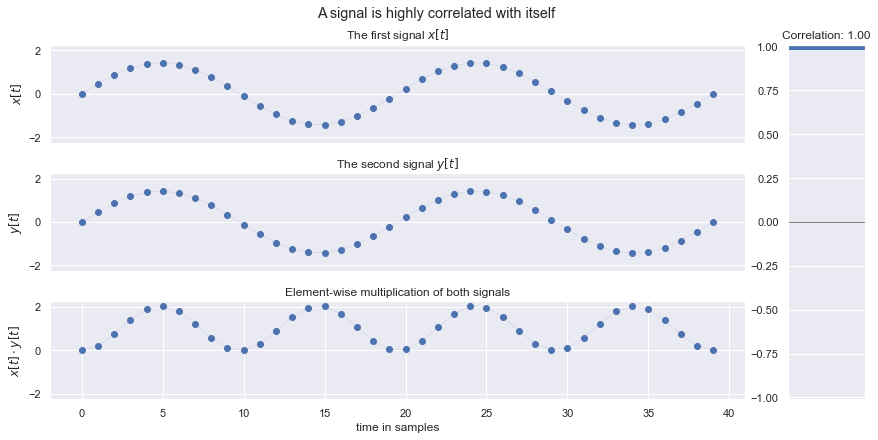

In [85]:
signal1 = np.sin(np.linspace(0, 4*np.pi, 40))
plot_correlation(signal1, signal1, "A signal is highly correlated with itself")

## Copyright

This notebook is licensed to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). Any further use (beyond use for the lecture) is only permitted if agreed with the [module lead](mailto:s.goetze@sheffield.ac.uk). 